In [1]:
import os
from os import walk

import pandas as pd
idx = pd.IndexSlice

import numpy as np
import sys
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:70% !important; }</style>"))

#Set seaborn color palette:
my_pal = {'Kourami' : sns.color_palette("tab10")[0], 'HLA-LA' : sns.color_palette("tab10")[1], 'Optitype' : sns.color_palette("tab10")[2], 'Hisatgenotype' : sns.color_palette("tab10")[3], 'STC-seq' : sns.color_palette("tab10")[4], 'Full Dataset' : sns.color_palette("tab10")[5]} 

In [2]:
main_folder_path = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\'

In [3]:
#Chose allele resolution: options: "two_field", "g_group" or "p_group" or "e_group"
resolution = "one_field"

resolution_list =  ["one_field", "e_group", "p_group", "two_field"]

resolution_list_names = ["1-field", "NetMHCpan seq", "P group", "2-field", ]

# Load result dataframes

In [4]:
full_res_results_df = pd.read_pickle(main_folder_path + "result_data\\" + resolution + "_results_df.pkl")

full_res_results_df = full_res_results_df.drop(['score', 'count'], axis=1, level=1)

full_res_results_df.rename({'accuracy' : '1-field accuracy'},  axis=1, level=1, inplace = True)

for i in range(len(resolution_list)-1):
    #Read result dataframes
    results_df = pd.read_pickle(main_folder_path + "result_data\\" + resolution_list[i+1] + "_results_df.pkl")
    
    results_df = results_df.drop(['score', 'count', 'call_rate'], axis=1, level=1)
    
    results_df.rename({'accuracy' : resolution_list_names[i+1] + ' accuracy'},  axis=1, level=1, inplace = True)
    
    full_res_results_df = pd.concat([full_res_results_df, results_df], axis=1)


In [5]:
results_df = full_res_results_df

In [6]:
results_df

Tool      Kourami                     HLA-LA                   Optitype  \
Metric  call_rate 1-field accuracy call_rate 1-field accuracy call_rate   
A           96.50            95.36     100.0            99.16     100.0   
B           86.37            84.68     100.0            99.34     100.0   
C           90.47            89.45     100.0            99.64     100.0   
DRB1        99.40            97.35     100.0            98.43       0.0   
DQB1        83.72            79.13     100.0            99.16       0.0   
HLA-I       91.11            89.83     100.0            99.38     100.0   
HLA-II      91.56            88.24     100.0            98.79       0.0   
Evaxion     93.18            91.71     100.0            99.14      75.0   
Total       91.29            89.19     100.0            99.14      60.0   

Tool                     Hisatgenotype                    STC-seq  \
Metric  1-field accuracy     call_rate 1-field accuracy call_rate   
A                  99.82         100.0            92.94     70.08   
B                  99.10         100.0            97.71     71.17   
C                  99.70         100.0            96.86     67.91   
DRB1                0.00         100.0            94.45     77.20   
DQB1                0.00         100.0            94.93     57.90   
HLA-I              99.54         100.0            95.84     69.72   
HLA-II              0.00         100.0            94.69     67.55   
Evaxion            74.65         100.0            95.49     71.59   
Total              59.72         100.0            95.38     68.85   

Tool                     ensemble_all                  ensemble_graph  \
Metric  1-field accuracy    call_rate 1-field accuracy      call_rate   
A                  60.31        100.0            99.58          100.0   
B                  58.02        100.0            99.16          100.0   
C                  58.62        100.0            99.03          100.0   
DRB1               67.25        100.0            96.80          100.0   
DQB1               52.17        100.0            92.04          100.0   
HLA-I              58.99        100.0            99.26          100.0   
HLA-II             59.71        100.0            94.42          100.0   
Evaxion            61.05        100.0            98.64          100.0   
Total              59.28        100.0            97.32          100.0   

Tool                                    Kourami                 HLA-LA  \
Metric  1-field accuracy NetMHCpan seq accuracy NetMHCpan seq accuracy   
A                  93.67                  87.52                  94.51   
B                  97.65                  78.65                  97.95   
C                  96.68                  83.59                  97.65   
DRB1               96.80                  96.44                  97.89   
DQB1               92.04                  75.57                  95.78   
HLA-I              96.00                  83.25                  96.70   
HLA-II             94.42                  86.01                  96.83   
Evaxion            96.20                  86.55                  97.00   
Total              95.37                  84.35                  96.76   

Tool                  Optitype          Hisatgenotype                STC-seq  \
Metric  NetMHCpan seq accuracy NetMHCpan seq accuracy NetMHCpan seq accuracy   
A                        99.03                  81.36                  52.11   
B                        98.25                  93.49                  47.53   
C                        99.34                  93.37                  47.35   
DRB1                      0.00                  89.26                  62.91   
DQB1                      0.00                  89.99                  48.25   
HLA-I                    98.87                  89.40                  48.99   
HLA-II                    0.00                  89.63                  55.58   
Evaxion                  74.16                  89.37                  52.4

# Plots of the Performance of the tools

In [7]:
idx = pd.IndexSlice

#labels in order:
# labels1 = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq', 'ensemble_all', 'ensemble_graph']
# labels2 = ['Kourami', 'HLA-LA', 'Hisatgenotype', 'STC-seq', 'ensemble_graph']
labels1 = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq']
labels2 = ['Kourami', 'HLA-LA', 'Hisatgenotype', 'STC-seq']



def make_plot_from_allele_list(allele_index):

    if allele_index in ('HLA-II', 'DRB1', 'DQB1'):
        call_rate = list(results_df.loc[allele_index, idx[labels2, 'call_rate']])
        accuracy_one_field = list(results_df.loc[allele_index, idx[labels2, '1-field accuracy']])
        accuracy_two_field = list(results_df.loc[allele_index, idx[labels2, '2-field accuracy']])
        accuracy_p_group = list(results_df.loc[allele_index, idx[labels2, 'P group accuracy']])
        accuracy_e_group = list(results_df.loc[allele_index, idx[labels2, 'NetMHCpan seq accuracy']])
      
        x = np.arange(len(labels2))
        
        
    else:   
        call_rate = list(results_df.loc[allele_index, idx[labels1, 'call_rate']])
        accuracy_one_field = list(results_df.loc[allele_index, idx[labels1, '1-field accuracy']])
        accuracy_two_field = list(results_df.loc[allele_index, idx[labels1, '2-field accuracy']])
        accuracy_p_group = list(results_df.loc[allele_index, idx[labels1, 'P group accuracy']])
        accuracy_e_group = list(results_df.loc[allele_index, idx[labels1, 'NetMHCpan seq accuracy']])
            
        x = np.arange(len(labels1))  # the label locations
 


    width = 0.18  # the width of the bars

    fig, ax = plt.subplots(figsize=(16,6))
    rects1 = ax.bar(x - 10*width/5, call_rate, width, label='call rate', color = '#808080')
    rects2 = ax.bar(x - 5*width/5, accuracy_one_field, width, label='1-field accuracy')
    rects3 = ax.bar(x, accuracy_e_group, width, label='NetMHCpan seq accuracy')
    rects4 = ax.bar(x + 5*width/5, accuracy_p_group, width, label='P group accuracy')
    rects5 = ax.bar(x + 10*width/5, accuracy_two_field, width, label='2-field accuracy')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy (%)')
    ax.set_xticks(x)
    
    if allele_index in ('HLA-II', 'DRB1', 'DQB1'):
        ax.set_xticklabels(['Kourami', 'HLA*LA', 'HISAT-genotype', 'STC-seq'], rotation = 45)
    else:
        ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'], rotation = 45)

    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, 10),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', 
                        color="w", size = 10, weight = 800)


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    
    
    # Major ticks every 20, minor ticks every 5
    minor_ticks = np.arange(0, 101, 5)

    ax.set_yticks(minor_ticks, minor=True)

    ax.grid(which='minor', alpha=0.4)
    
#    ax.set_ylim([40,105])

    # Or if you want different settings for the grids:
    plt.grid(axis = 'y')
    ax.set_axisbelow(True)

    plt.legend(bbox_to_anchor=(0.83, 1.0), loc='upper left')
    plt.tight_layout()

    plt.title('HLA typing performance for allele: ' + allele_index)
    return plt, ax

## Overall Results

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <AxesSubplot:title={'center':'HLA typing performance for allele: HLA-I'}, ylabel='Accuracy (%)'>)

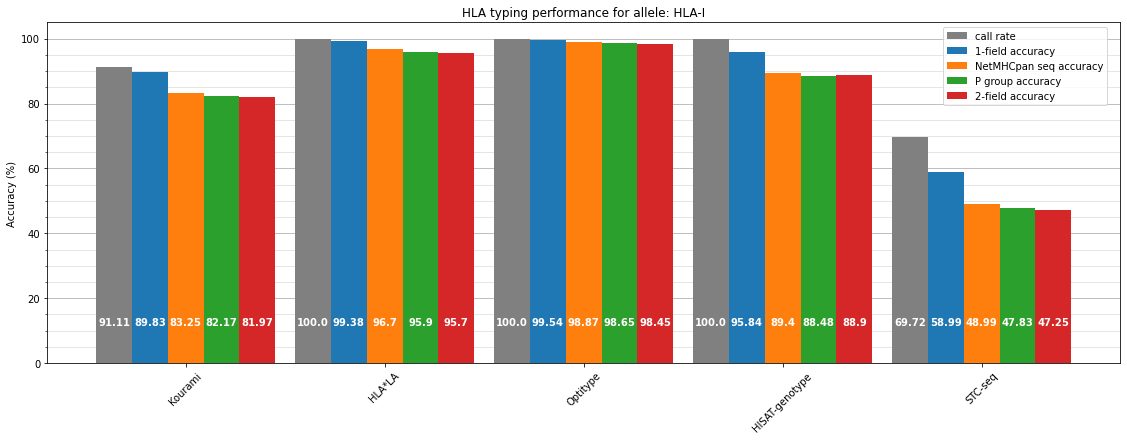

In [8]:
make_plot_from_allele_list('HLA-I')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <AxesSubplot:title={'center':'HLA typing performance for allele: HLA-II'}, ylabel='Accuracy (%)'>)

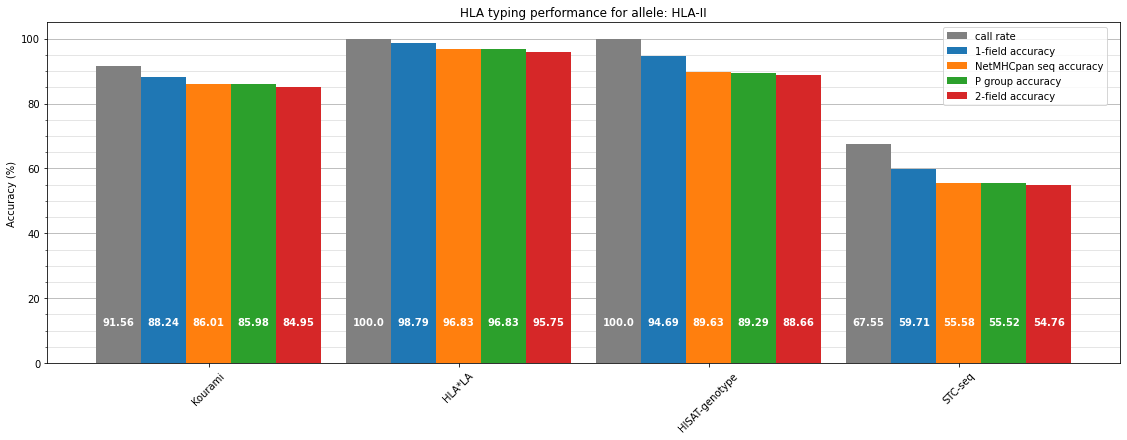

In [9]:
make_plot_from_allele_list('HLA-II')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <AxesSubplot:title={'center':'HLA typing performance for allele: Evaxion'}, ylabel='Accuracy (%)'>)

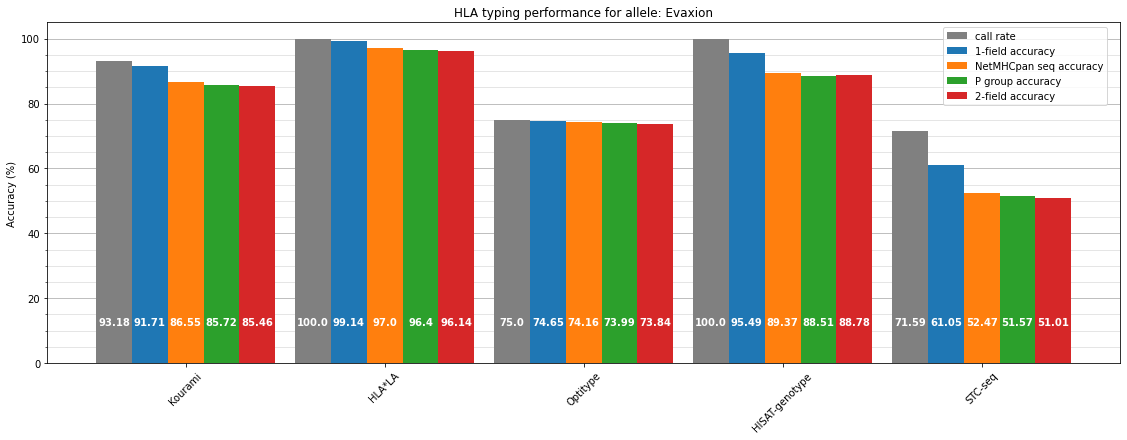

In [10]:
make_plot_from_allele_list('Evaxion')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <AxesSubplot:title={'center':'HLA typing performance for allele: HLA-II'}, ylabel='Accuracy (%)'>)

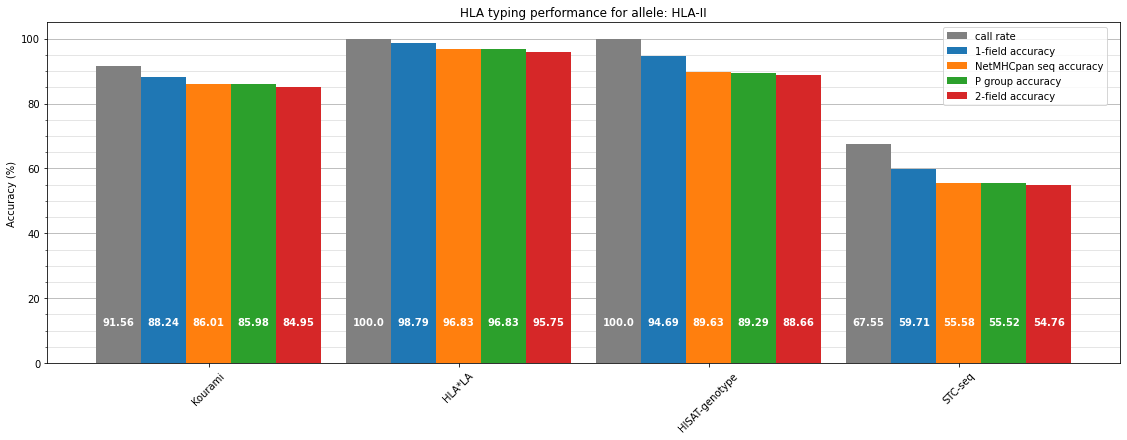

In [11]:
make_plot_from_allele_list('HLA-II')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <AxesSubplot:title={'center':'HLA typing performance for allele: DRB1'}, ylabel='Accuracy (%)'>)

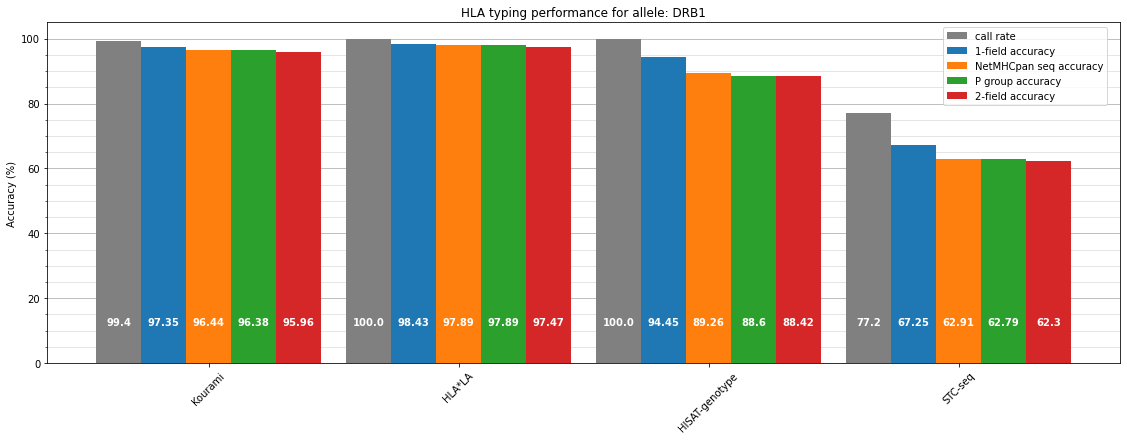

In [12]:
make_plot_from_allele_list('DRB1')